
<table class="ee-notebook-buttons" align="left">
    <td><a target="_parent"  href="https://github.com/MVOSlab-sdstate/Lab/blob/main/Lab%2011/AST426L-Lab11-Fall2024-Pyadav.ipynb#scrollTo=DobD4JDexbn6"><img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /> View source on GitHub</a></td>
    <td><a target="_parent"  href="https://nbviewer.org/github/MVOSlab-sdstate/Lab/blob/main/Lab%2011/AST426L-Lab11-Fall2024-Pyadav.ipynb#scrollTo=DobD4JDexbn6"><img width=26px src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/Jupyter_logo.svg/883px-Jupyter_logo.svg.png" />Notebook Viewer</a></td>
    <td><a target="_parent"  href="https://colab.research.google.com/github/MVOSlab-sdstate/Lab/blob/main/Lab%2011/AST426L-Lab11-Fall2024-Pyadav.ipynb#scrollTo=DobD4JDexbn6"><img width=26px src="https://www.tensorflow.org/images/colab_logo_32px.png" /> Run in Google Colab</a></td>
    </table>

<p style = "font-size: X-large; font-family:'Georgia';"> Install Required Libraries </p>

In [ ]:
# Install necessary libraries
!pip install rasterio geopandas folium matplotlib ipywidgets gdal google-auth google-colab pyproj


<p style = "font-size: X-large; font-family:'Georgia';"> Connect to Google Drive </p>

In [ ]:
# Import Google Drive for file management
from google.colab import drive

# Mount Google Drive to access the multispectral images
drive.mount('/content/drive')


Mounted at /content/drive


<p style = "font-size: X-large; font-family:'Georgia';"> Define Paths to the Band Orthomosaic Files </p>

In [ ]:
# Define the directory path where the pre-generated orthomosaic .tif images are stored
image_dir = '/content/drive/MyDrive/AST426L-Lab11'  # Update with your folder path

# Define file paths for the individual band orthomosaics
green_band_path = f"{image_dir}/dave_claussen_north_field_8_9_2022_transparent_mosaic_green.tif"   # Replace with the actual file name
red_band_path = f"{image_dir}/dave_claussen_north_field_8_9_2022_transparent_mosaic_red.tif"       # Replace with the actual file name
nir_band_path = f"{image_dir}/dave_claussen_north_field_8_9_2022_transparent_mosaic_nir.tif"       # Replace with the actual file name
red_edge_band_path = f"{image_dir}/dave_claussen_north_field_8_9_2022_transparent_mosaic_red edge.tif"  # Replace with the actual file name



<p style = "font-size: X-large; font-family:'Georgia';"> Load the Bands </p>

In [ ]:
import rasterio

# Function to load a band from its .tif file
def load_band(band_path):
    with rasterio.open(band_path) as src:
        band = src.read(1)  # Read the first band
        bounds = src.bounds
        transform = src.transform
    return band, bounds, transform

# Load each band
green_band, bounds, transform = load_band(green_band_path)
red_band, _, _ = load_band(red_band_path)
nir_band, _, _ = load_band(nir_band_path)
red_edge_band, _, _ = load_band(red_edge_band_path)

# Confirm successful loading
print("Green, Red, NIR, and Red-Edge bands loaded successfully.")


Green, Red, NIR, and Red-Edge bands loaded successfully.


<p style = "font-size: X-large; font-family:'Georgia';"> Check the CRS Projection of orthomosiac </p>

In [ ]:
# Check the CRS of the orthomosaic
import rasterio

with rasterio.open(green_band_path) as src:
    crs = src.crs
    bounds = src.bounds

print(f"CRS: {crs}")
print(f"Bounds: {bounds}")


CRS: EPSG:32614
Bounds: BoundingBox(left=610864.00459, bottom=4884281.09472, right=611217.87627, top=4885032.63408)


<p style = "font-size: X-large; font-family:'Georgia';"> Reproject the Orthomosaic to EPSG:4326 </p>

In [ ]:
# Install GDAL if not already installed
!apt-get install -y gdal-bin

# Reproject the Green Band orthomosaic to EPSG:4326
!gdalwarp -t_srs EPSG:4326 "/content/drive/MyDrive/AST426L-Lab11/dave_claussen_north_field_8_9_2022_transparent_mosaic_green.tif" \
          "/content/drive/MyDrive/AST426L-Lab11/green_band_reprojected.tif"

# Similarly, reproject other bands
!gdalwarp -t_srs EPSG:4326 "/content/drive/MyDrive/AST426L-Lab11/dave_claussen_north_field_8_9_2022_transparent_mosaic_red.tif" \
          "/content/drive/MyDrive/AST426L-Lab11/red_band_reprojected.tif"

!gdalwarp -t_srs EPSG:4326 "/content/drive/MyDrive/AST426L-Lab11/dave_claussen_north_field_8_9_2022_transparent_mosaic_nir.tif" \
          "/content/drive/MyDrive/AST426L-Lab11/nir_band_reprojected.tif"

!gdalwarp -t_srs EPSG:4326 "/content/drive/MyDrive/AST426L-Lab11/dave_claussen_north_field_8_9_2022_transparent_mosaic_red edge.tif" \
          "/content/drive/MyDrive/AST426L-Lab11/red_edge_band_reprojected.tif"


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
gdal-bin is already the newest version (3.6.4+dfsg-1~jammy0).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Creating output file that is 4320P x 6433L.
Processing /content/drive/MyDrive/AST426L-Lab11/dave_claussen_north_field_8_9_2022_transparent_mosaic_green.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.
Creating output file that is 4320P x 6433L.
Processing /content/drive/MyDrive/AST426L-Lab11/dave_claussen_north_field_8_9_2022_transparent_mosaic_red.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.
Creating output file that is 4320P x 6433L.
Processing /content/drive/MyDrive/AST426L-Lab11/dave_claussen_north_field_8_9_2022_transparent_mosaic_nir.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.
Creating output file that is 4320P x 6433L.
Processing /content/drive/MyDrive/AST426L-Lab11/dave_claussen_

<p style = "font-size: X-large; font-family:'Georgia';"> Update the file paths in your script to point to the reprojected files: </p>

In [ ]:
green_band_path = "/content/drive/MyDrive/AST426L-Lab11/green_band_reprojected.tif"
red_band_path = "/content/drive/MyDrive/AST426L-Lab11/red_band_reprojected.tif"
nir_band_path = "/content/drive/MyDrive/AST426L-Lab11/nir_band_reprojected.tif"
red_edge_band_path = "/content/drive/MyDrive/AST426L-Lab11/red_edge_band_reprojected.tif"


<p style = "font-size: X-large; font-family:'Georgia';"> Load the Reprojected Bands </p>

In [ ]:
# Load the reprojected bands
green_band, bounds, transform = load_band(green_band_path)
red_band, _, _ = load_band(red_band_path)
nir_band, _, _ = load_band(nir_band_path)
red_edge_band, _, _ = load_band(red_edge_band_path)

print("Reprojected bands loaded successfully.")


Reprojected bands loaded successfully.


<p style = "font-size: X-large; font-family:'Georgia';"> Display any Band on a Map. Remember single band images appears grayscale! </p>

In [ ]:
import folium
import numpy as np

def display_band_on_map(band, bounds, title="Band Map"):
    # Normalize the band values to 0–1 for display
    normalized_band = normalize_band(band)

    # Convert the normalized band to grayscale RGB
    grayscale_band = np.stack([normalized_band] * 3, axis=-1)  # R=G=B for grayscale

    # Get map center coordinates
    center_lat = (bounds.top + bounds.bottom) / 2
    center_lon = (bounds.left + bounds.right) / 2

    # Create a folium map centered on the bounds with satellite basemap
    fmap = folium.Map(
        location=[center_lat, center_lon],
        zoom_start=14,
        tiles="https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}",
        attr="Esri Satellite"
    )

    # Overlay the grayscale raster band on the map
    folium.raster_layers.ImageOverlay(
        image=grayscale_band,
        bounds=[[bounds.bottom, bounds.left], [bounds.top, bounds.right]],
        opacity=0.8
    ).add_to(fmap)

    # Add a layer control for better interactivity
    folium.LayerControl().add_to(fmap)
    return fmap


# Display the NIR Band orthomosaic as grayscale on a satellite basemap
fmap = display_band_on_map(nir_band, bounds, "NIR Band Grayscale")
fmap

fmap


<p style = "font-size: X-large; font-family:'Georgia';"> Now display Pseudo-RGB Orthomosiac. Please note the imaging sensor didn't have blue band, so we have created synthetic blue band to generate Pseudo-RGB Orthomosiac image. </p>

In [ ]:
# Create a mock RGB orthomosaic for testing (height x width x 3)

red_channel = red_band
green_channel = green_band
blue_channel = np.full_like(red_band, 0.5)
rgb_orthomosaic = np.stack([red_channel, green_channel, blue_channel], axis=-1)



def display_rgb_on_map(rgb_image, bounds, title="RGB Orthomosaic"):
    # Ensure the image is properly normalized to 0–1 for display
    rgb_normalized = rgb_image.astype(float)
    for i in range(3):  # Normalize each channel independently
        rgb_normalized[:, :, i] = (rgb_normalized[:, :, i] - np.min(rgb_normalized[:, :, i])) / (
            np.max(rgb_normalized[:, :, i]) - np.min(rgb_normalized[:, :, i])
        )

    # Get map center coordinates
    center_lat = (bounds.top + bounds.bottom) / 2
    center_lon = (bounds.left + bounds.right) / 2

    # Create a folium map centered on the bounds with satellite basemap
    fmap = folium.Map(
        location=[center_lat, center_lon],
        zoom_start=14,
        tiles="https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}",
        attr="Esri Satellite"
    )

    # Overlay the RGB orthomosaic on the map
    folium.raster_layers.ImageOverlay(
        image=rgb_normalized,
        bounds=[[bounds.bottom, bounds.left], [bounds.top, bounds.right]],
        opacity=0.8
    ).add_to(fmap)

    # Add a layer control for better interactivity
    folium.LayerControl().add_to(fmap)
    return fmap


# Example: Display the RGB orthomosaic on the basemap
fmap_rgb = display_rgb_on_map(rgb_orthomosaic, bounds, "RGB Orthomosaic")
fmap_rgb


<p style = "font-size: X-large; font-family:'Georgia';"> Generate NDVI and NDRE Maps </p>

In [ ]:
# Function to safely calculate vegetation index
def calculate_vegetation_index_safe(band1, band2, equation):
    epsilon = 1e-6  # Small value to prevent division by zero
    denominator = band1 + band2 + epsilon
    index = equation(band1, band2) / denominator
    index[np.isnan(index)] = 0  # Replace NaN values with 0
    index[np.isinf(index)] = 0  # Replace Infinity values with 0
    return index

# Calculate NDVI
ndvi_map = calculate_vegetation_index_safe(
    nir_band, red_band,
    lambda nir, red: (nir - red)
)

# Calculate NDRE
ndre_map = calculate_vegetation_index_safe(
    nir_band, red_edge_band,
    lambda nir, red_edge: (nir - red_edge)
)




In [ ]:
print(f"NDVI Range: {np.min(ndvi_map)} to {np.max(ndvi_map)}")
print(f"NDRE Range: {np.min(ndre_map)} to {np.max(ndre_map)}")


NDVI Range: 0.0 to 65530000000.0
NDRE Range: 0.0 to 65434000000.0


In [ ]:
# Normalize the band values to 0–1
def normalize_band(band):
    max_value = 65535  # Assuming 16-bit image
    return band / max_value

# Normalize all the bands
green_band_norm = normalize_band(green_band)
red_band_norm = normalize_band(red_band)
nir_band_norm = normalize_band(nir_band)
red_edge_band_norm = normalize_band(red_edge_band)

# Function to safely calculate vegetation index
def calculate_vegetation_index_safe(band1, band2, equation):
    epsilon = 1e-6  # Small value to prevent division by zero
    denominator = band1 + band2 + epsilon
    index = equation(band1, band2) / denominator
    index[np.isnan(index)] = 0  # Replace NaN values with 0
    index[np.isinf(index)] = 0  # Replace Infinity values with 0
    return index

# Calculate NDVI
ndvi_map = calculate_vegetation_index_safe(
    nir_band_norm, red_band_norm,
    lambda nir, red: (nir - red)
)

# Calculate NDRE
ndre_map = calculate_vegetation_index_safe(
    nir_band_norm, red_edge_band_norm,
    lambda nir, red_edge: (nir - red_edge)
)

# Print the corrected ranges
print(f"NDVI Range: {np.min(ndvi_map)} to {np.max(ndvi_map)}")
print(f"NDRE Range: {np.min(ndre_map)} to {np.max(ndre_map)}")


NDVI Range: -0.5301059653584892 to 0.7208800653253512
NDRE Range: -0.2706521521983967 to 0.3177964212804161


<p style = "font-size: X-large; font-family:'Georgia';"> Display NDVI and NDRE Maps </p>

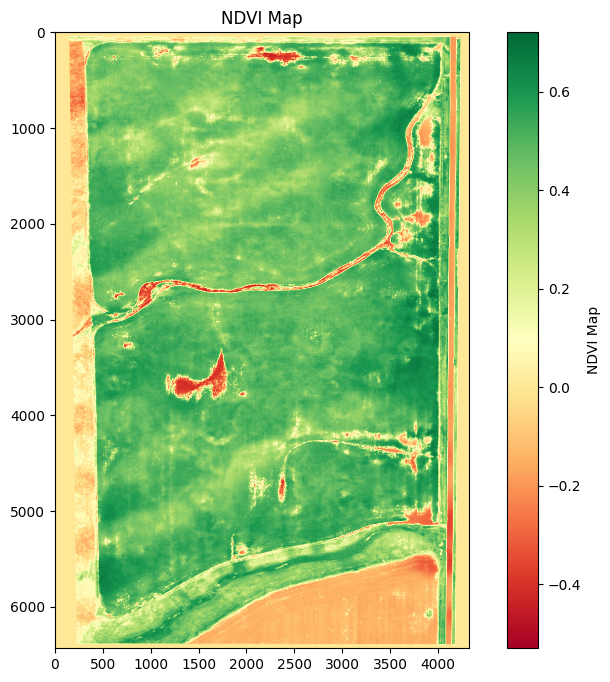

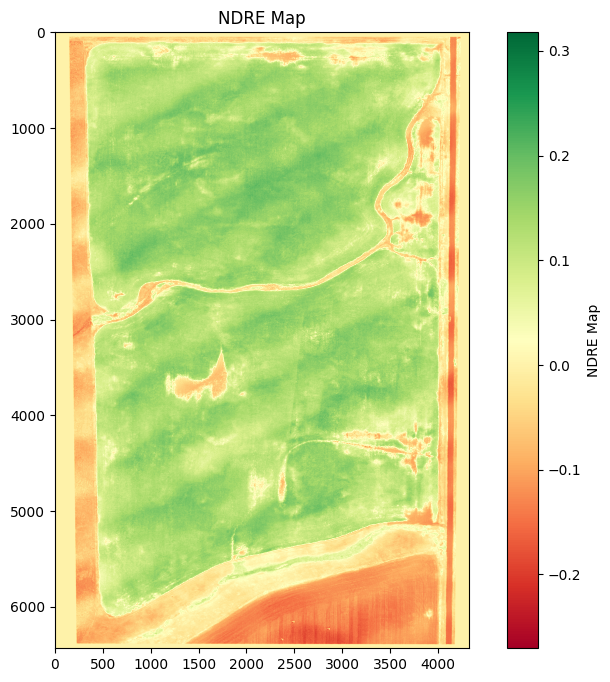

In [ ]:
# Function to display vegetation index maps
def plot_index_map(index_map, title):
    plt.figure(figsize=(10, 8))
    plt.imshow(index_map, cmap='RdYlGn')
    plt.colorbar(label=title)
    plt.title(title)
    plt.show()

# Display NDVI and NDRE maps
plot_index_map(ndvi_map, "NDVI Map")
plot_index_map(ndre_map, "NDRE Map")



<p style = "font-size: X-large; font-family:'Georgia';"> Create Zones with a slider bar to adjust dynamically number of zones. This uses K-means clustering algorithm. You can dynamically adjust the number of zones but have patience and wait for the map to automatically update. </p>

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

def plot_kmeans_zones_with_contours(index_map, num_zones):
    # Ensure the index map is a 2D array
    if index_map.ndim != 2:
        raise ValueError(f"Expected a 2D array for the index map, but got shape {index_map.shape}.")

    # Flatten the 2D array to apply K-Means
    flat_index_map = index_map.flatten().reshape(-1, 1)

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=num_zones, random_state=0, n_init=10)
    kmeans.fit(flat_index_map)
    clustered = kmeans.labels_.reshape(index_map.shape)

    # Sort cluster centers and reassign labels for consistency
    sorted_indices = np.argsort(kmeans.cluster_centers_.flatten())
    label_mapping = {old: new for new, old in enumerate(sorted_indices)}
    clustered = np.vectorize(label_mapping.get)(clustered)

    # Plot the clustered zones
    plt.figure(figsize=(10, 8))
    plt.imshow(clustered, cmap='RdYlGn', origin='upper')
    cbar = plt.colorbar(label="Zone Index")
    cbar.set_ticks(range(num_zones))
    cbar.set_ticklabels([f"Zone {i+1}" for i in range(num_zones)])

    # Title and display
    plt.title(f"K-Means Zones with {num_zones} Clusters")
    plt.xlabel("X-axis (pixels)")
    plt.ylabel("Y-axis (pixels)")
    plt.show()

# Interactive function for K-Means zoning
@interact(num_zones=IntSlider(min=2, max=10, step=1, value=5))
def interactive_kmeans_zones(num_zones):
    plot_kmeans_zones_with_contours(ndvi_map, num_zones)   #You can generate this using ndre_map also.




interactive(children=(IntSlider(value=5, description='num_zones', max=10, min=2), Output()), _dom_classes=('wi…

<p style = "font-size: X-large; font-family:'Georgia';"> Yield Maps with Equally Spaced Zones. Adjust number of zones dynamically. Have patience and wait after you change number of zones using the slider. It takes time to update the map. </p>

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

def plot_yield_kmeans_zones(yield_map, num_zones):
    # Ensure the yield map is a 2D array
    if yield_map.ndim != 2:
        raise ValueError(f"Expected a 2D array for the yield map, but got shape {yield_map.shape}.")

    # Flatten the 2D array to apply K-Means
    flat_yield_map = yield_map.flatten().reshape(-1, 1)

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=num_zones, random_state=0, n_init=10)
    kmeans.fit(flat_yield_map)
    clustered = kmeans.labels_.reshape(yield_map.shape)

    # Sort cluster centers and reassign labels for consistency
    sorted_indices = np.argsort(kmeans.cluster_centers_.flatten())
    label_mapping = {old: new for new, old in enumerate(sorted_indices)}
    clustered = np.vectorize(label_mapping.get)(clustered)

    # Get ranges of bushels/acre for each zone
    sorted_centers = kmeans.cluster_centers_.flatten()[sorted_indices]
    ranges = [(sorted_centers[i], sorted_centers[i + 1]) if i < len(sorted_centers) - 1 else (sorted_centers[i], np.max(yield_map)) for i in range(len(sorted_centers))]

    # Plot the clustered yield zones
    plt.figure(figsize=(10, 8))
    plt.imshow(clustered, cmap='RdYlGn', origin='upper')  # Use a red-yellow-green color map for yield zones
    cbar = plt.colorbar(label="Yield (bushels/acre)")
    cbar.set_ticks(range(num_zones))
    cbar.set_ticklabels([f"{r[0]:.1f} - {r[1]:.1f}" for r in ranges])  # Set labels as ranges

    # Title and display
    plt.title(f"Yield Zones with {num_zones} Clusters")
    plt.xlabel("X-axis (pixels)")
    plt.ylabel("Y-axis (pixels)")
    plt.show()

# Interactive function for K-Means-based yield zones
@interact(num_zones=IntSlider(min=2, max=10, step=1, value=5))
def interactive_yield_kmeans(num_zones):
    plot_yield_kmeans_zones(yield_ndvi, num_zones)  # Replace yield_ndvi with your yield_ndre map



interactive(children=(IntSlider(value=5, description='num_zones', max=10, min=2), Output()), _dom_classes=('wi…

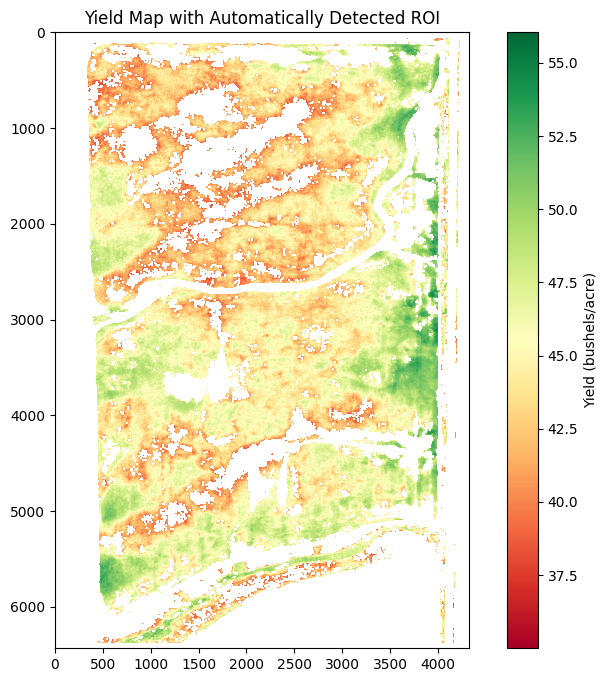

In [ ]:
def detect_roi(image, threshold=0.25):
    """
    Automatically detect the ROI based on a threshold.

    Parameters:
    - image: NDVI or other index map (2D NumPy array)
    - threshold: Value above which pixels are considered part of the ROI

    Returns:
    - ROI mask as a binary array
    """
    return image > threshold

# Example: Detect the ROI
roi_mask = detect_roi(ndvi_map, threshold=0.3)

# Apply the ROI mask
masked_yield_map = np.where(roi_mask, yield_ndvi, np.nan)

# Plot the masked yield map
plt.figure(figsize=(10, 8))
plt.imshow(masked_yield_map, cmap='RdYlGn', origin='upper')
plt.title("Yield Map with Automatically Detected ROI")
plt.colorbar(label="Yield (bushels/acre)")
plt.show()
